# üå∏ Clasificaci√≥n de Flores Iris con Machine Learning

## Contenido:
* [Introducci√≥n](#introducci√≥n)
* [Carga de datos e Inspecci√≥n](#Carga-de-datos-e-Inspecci√≥n)
* [An√°lisis Exploratorio de Datos (EDA)](#An√°lisis-Exploratorio-de-Datos-(EDA))
* [Limpieza de Datos y Preprocesamiento](#Limpieza-de-Datos-y-Preprocesamiento)
* [Entrenamiento de Modelos y Evaluaci√≥n](#Entrenamiento-de-Modelos-y-Evaluaci√≥n)
* [Conclusi√≥n](#Conclusi√≥n)

## **Introducci√≥n:**

Este proyecto utiliza el cl√°sico dataset de *Iris* para demostrar c√≥mo aplicar aprendizaje autom√°tico para clasificar flores en tres especies: *Iris-setosa*, *Iris-versicolor* e *Iris-virginica* üå∫.

### Objetivo
Entrenar modelos de clasificaci√≥n que predigan correctamente la especie de una flor bas√°ndose en el largo y ancho de sus s√©palos y p√©talos.

### Dataset
Contiene 150 registros con las siguientes caracter√≠sticas:
- Longitud y ancho del s√©palo (cm)
- Longitud y ancho del p√©talo (cm)
- Especie (etiqueta)

## **Carga de datos e Inspecci√≥n**

In [2]:
# Carga de datos e inspecci√≥n

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

# Configuraci√≥n de estilo para los gr√°ficos
sns.set(style="whitegrid")


# Cargar el dataset desde el archivo CSV
df = pd.read_csv("Iris.csv")

# Inspeccionar las primeras filas del DataFrame
df.head()




Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [3]:
# Obtener informaci√≥n general del DataFrame (tipos de datos, no nulos)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# Ver las √∫ltimas 5 filas
df.tail()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica

In [5]:
# Mostrar las dimensiones del dataset
print(f"Dimensiones del dataset: {df.shape}")

Dimensiones del dataset: (150, 6)


In [6]:
# Verificar la existencia de valores nulos o faltantes en cada columna
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
#Ver estad√≠sticas num√©ricas para las columnas correspondientes
df.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [8]:

#Mostrar el nombre de las columnas 
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
#Eliminar la columna "Id"
df = df.drop(columns=["Id"])

In [10]:
#Renombrar columnas a min√∫sculas y con guiones 
df.columns = df.columns.str.lower().str.replace("cm", "").str.replace(" ", "_")

In [11]:
#Mostrar las primeras filas para verificar los cambios en el dataframe
df.head()

sepallength  sepalwidth  petallength  petalwidth      species
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

## **An√°lisis Exploratorio de Datos (EDA)**

### Pairplot (Gr√°fico de Pares)

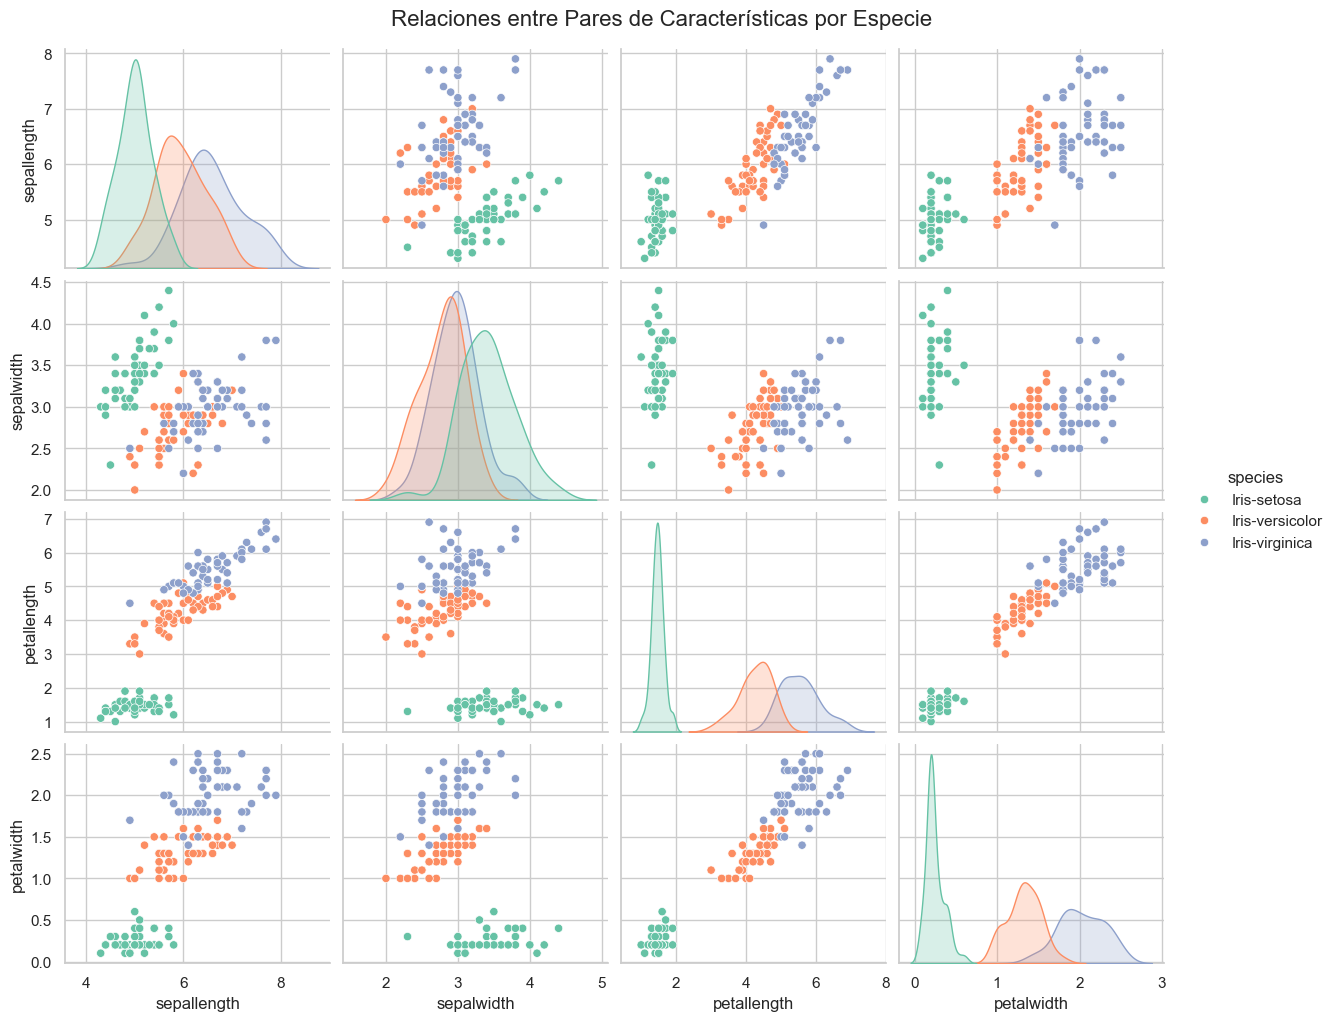

In [12]:
# Gr√°fico de pares (pairplot) para visualizar relaciones bivariadas, coloreado por especie
sns.pairplot(df, hue="species", palette="Set2",height= 2.5, aspect=1.2)
plt.suptitle('Relaciones entre Pares de Caracter√≠sticas por Especie', y=1.02, size=16)
plt.show()

### Interpretaci√≥n del Gr√°fico de Pares: Relaciones entre Caracter√≠sticas por Especie

El gr√°fico de pares muestra las relaciones bivariadas entre las caracter√≠sticas del conjunto de datos de **Iris** (`sepal length`, `sepal width`, `petal length`, `petal width`), diferenciadas por especie (`Iris-setosa`, `Iris-versicolor`, `Iris-virginica`) mediante colores distintos.

* **Iris-setosa** (verde):

  * Se distingue claramente de las otras dos especies en las variables relacionadas con el **p√©talo** (`petal length` y `petal width`).
  * Sus p√©talos son notablemente m√°s peque√±os que los de las otras especies, lo que crea una separaci√≥n clara en las gr√°ficas de dispersi√≥n.
  * Muestra menos variabilidad interna en sus medidas.

* **Iris-versicolor** (naranja) y **Iris-virginica** (azul):

  * Estas dos especies se superponen parcialmente en varias combinaciones de caracter√≠sticas, especialmente en `sepal length` y `sepal width`.
  * Sin embargo, se logra cierta diferenciaci√≥n en los gr√°ficos que involucran `petal length` y `petal width`, aunque no tan marcada como en el caso de la setosa.

Este gr√°fico de pares permite visualizar c√≥mo las caracter√≠sticas morfol√≥gicas de las flores se agrupan seg√∫n la especie. Es especialmente √∫til para identificar qu√© variables ofrecen mayor poder discriminante. En este caso, **las medidas del p√©talo** (longitud y ancho) son m√°s eficaces para separar las especies, lo que puede ser clave para modelos de clasificaci√≥n.



### Heatmap (Mapa de Calor)

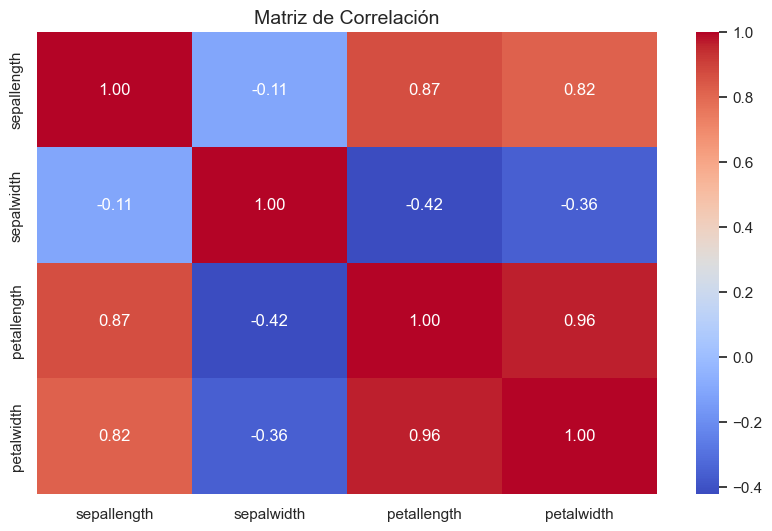

In [13]:
# Matriz de correlaci√≥n para cuantificar la relaci√≥n lineal entre variables
plt.figure(figsize=(10, 6))
# Usamos df.corr(numeric_only=True) para calcular la correlaci√≥n solo en columnas num√©ricas
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlaci√≥n", size=14)
plt.show()

### Matriz de Correlaci√≥n - Conjunto de Datos Iris

La matriz de correlaci√≥n nos permite entender la relaci√≥n lineal entre las diferentes caracter√≠sticas (features) de las flores en el dataset Iris. A continuaci√≥n, se analizan las correlaciones m√°s relevantes:

* üîπ **PetalLength y PetalWidth**:
  Correlaci√≥n muy alta (**0.96**). Esto indica una relaci√≥n fuertemente positiva: a mayor largo del p√©talo, mayor ser√° su ancho. Estas variables son casi linealmente dependientes.

* üîπ **PetalLength y SepalLength**:
  Alta correlaci√≥n (**0.87**). Sugiere que el largo del p√©talo tambi√©n aumenta con el largo del s√©palo, aunque no tan fuerte como con el ancho del p√©talo.

* üîπ **PetalWidth y SepalLength**:
  Correlaci√≥n positiva alta (**0.82**), lo que refuerza que las dimensiones del p√©talo y s√©palo est√°n relacionadas.

* üîπ **SepalWidth y las dem√°s variables**:
  Presenta correlaciones negativas moderadas:

  * Con PetalLength: **-0.42**
  * Con PetalWidth: **-0.36**
  * Con SepalLength: **-0.11**
    Esto indica que el ancho del s√©palo tiende a disminuir cuando las otras variables aumentan.

### Boxplot (Gr√°fico de Caja)

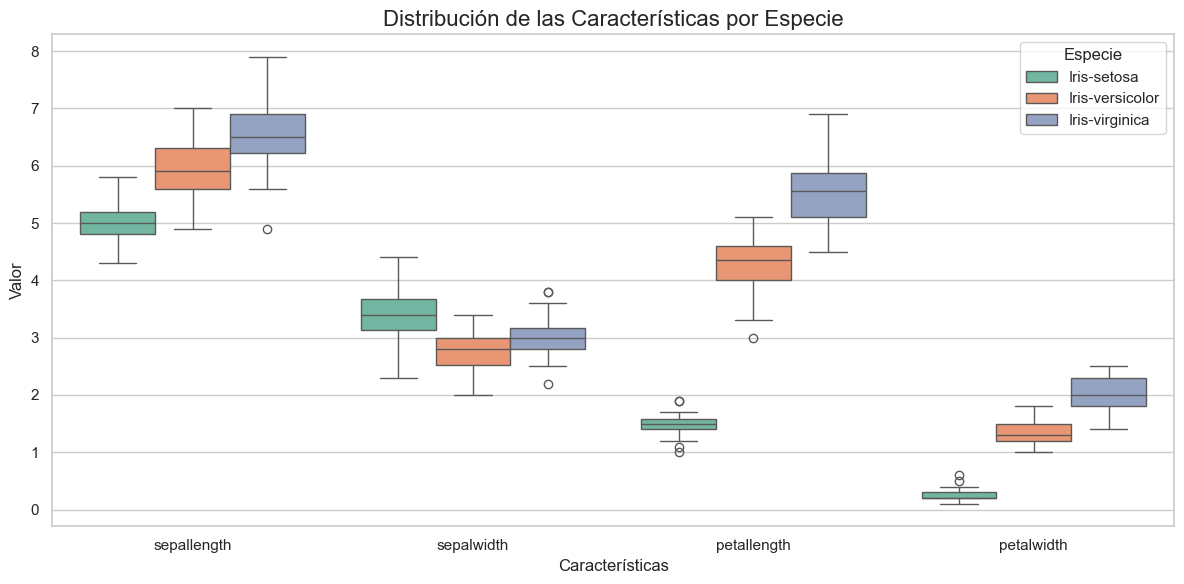

In [14]:
# Reorganizamos el DataFrame para tener columnas 'species', 'feature' y 'value'
df_melted = pd.melt(df, id_vars="species", value_vars=["sepallength", "sepalwidth", "petallength", "petalwidth"],
                    var_name="feature", value_name="value")

plt.figure(figsize=(12, 6))
sns.boxplot(x="feature", y="value", hue="species", data=df_melted, palette="Set2")

plt.title("Distribuci√≥n de las Caracter√≠sticas por Especie", fontsize=16)
plt.xlabel("Caracter√≠sticas")
plt.ylabel("Valor")
plt.legend(title="Especie")
plt.tight_layout()
plt.show()

### An√°lisis de Boxplots por Especie de Flor - Conjunto de Datos *Iris*

El siguiente gr√°fico muestra boxplots comparando las cuatro caracter√≠sticas principales de las flores del conjunto de datos *Iris*: **longitud y ancho del s√©palo** (`sepal length`, `sepal width`) y **longitud y ancho del p√©talo** (`petal length`, `petal width`), agrupadas por especie: *setosa*, *versicolor* y *virginica*.

* **Petal Length y Petal Width** son las variables que **mejor separan** visualmente a las tres especies.

  * *Setosa* tiene p√©talos claramente m√°s cortos y delgados que las otras dos especies.
  * *Virginica* tiene los p√©talos m√°s largos y anchos.
  * *Versicolor* se encuentra en un rango intermedio.

* En contraste, **Sepal Length y Sepal Width** presentan **m√°s solapamiento entre especies**, especialmente entre *versicolor* y *virginica*.
  Esto sugiere que no son tan √∫tiles para la clasificaci√≥n por s√≠ solas.

* Se observan **outliers (valores at√≠picos)** en algunas especies, especialmente en `sepal width` de *setosa* y *virginica*.
  Aunque son pocos, vale la pena tenerlos en cuenta si se va a aplicar un modelo sensible a valores extremos, como una regresi√≥n lineal.


### Scatter Plot (Gr√°fico de Dispersi√≥n)

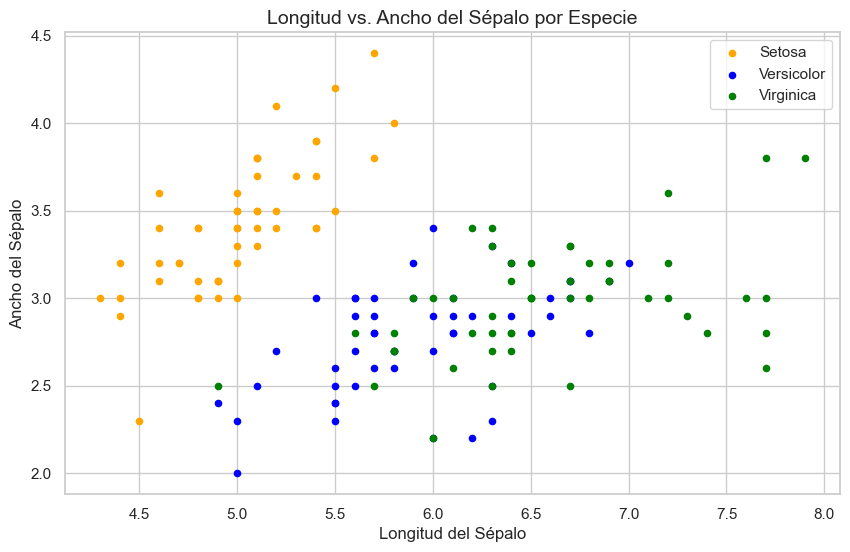

In [15]:
# Gr√°fico de dispersi√≥n (Scatter Plot) de Longitud vs. Ancho del S√©palo
fig = df[df.species=='Iris-setosa'].plot(kind='scatter', x='sepallength', y='sepalwidth', color='orange', label='Setosa', figsize=(10, 6))
df[df.species == 'Iris-versicolor'].plot(kind='scatter', x='sepallength', y='sepalwidth', color='blue', label='Versicolor', ax=fig)
df[df.species == 'Iris-virginica'].plot(kind='scatter', x='sepallength', y='sepalwidth', color='green', label='Virginica', ax=fig) 
fig.set_xlabel("Longitud del S√©palo")
fig.set_ylabel("Ancho del S√©palo")
fig.set_title("Longitud vs. Ancho del S√©palo por Especie", size=14)
plt.legend()
plt.show()



### Interpretaci√≥n del Gr√°fico de Dispersi√≥n: Longitud vs. Ancho del S√©palo por Especie (Conjunto de Datos Iris)

Este gr√°fico de dispersi√≥n presenta la distribuci√≥n de tres especies de la flor Iris (Setosa, Versicolor y Virginica) bas√°ndose en dos de sus caracter√≠sticas morfol√≥gicas: la longitud del s√©palo y el ancho del s√©palo.

1.  **Iris Setosa (Naranja):**
    * Los puntos que representan a la especie Setosa est√°n claramente agrupados en la **esquina inferior izquierda** del gr√°fico.
    * Esta agrupaci√≥n indica que las flores Iris Setosa tienden a tener **s√©palos m√°s cortos y, a menudo, m√°s anchos** en comparaci√≥n con las otras dos especies.
    * Es evidente una **separaci√≥n casi perfecta** de la Setosa con respecto a las especies Versicolor y Virginica. Esto sugiere que la longitud y el ancho del s√©palo son caracter√≠sticas muy efectivas y distintivas para identificar y clasificar la Iris Setosa.

2.  **Iris Versicolor (Azul) e Iris Virginica (Verde):**
    * A diferencia de la Setosa, estas dos especies muestran un **grado de solapamiento significativo** entre s√≠ en el centro y la parte superior derecha del gr√°fico.
    * **Iris Versicolor (Azul):** Ocupa una regi√≥n intermedia. Sus s√©palos tienen longitudes y anchos que se sit√∫an entre los de la Setosa y la Virginica.
    * **Iris Virginica (Verde):** Predomina en la parte **superior derecha** del gr√°fico, indicando que sus s√©palos son generalmente **m√°s largos**. Aunque tambi√©n se solapa con Versicolor, tiende hacia valores mayores de longitud de s√©palo.
    * El solapamiento entre Versicolor y Virginica implica que, bas√°ndose √∫nicamente en la longitud y el ancho del s√©palo, podr√≠a ser m√°s dif√≠cil diferenciarlas con total precisi√≥n en comparaci√≥n con la Setosa.

### Violinplot (Gr√°fico de Viol√≠n)

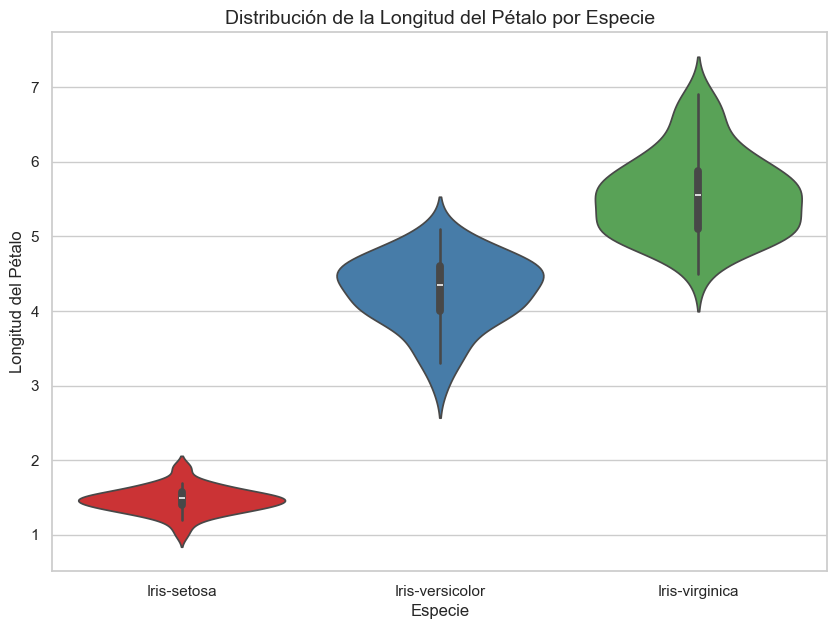

In [16]:
# Gr√°fico de viol√≠n (Violinplot) para comparar la longitud del p√©talo
plt.figure(figsize=(10, 7))
sns.violinplot(data=df, x='species', y='petallength', hue='species', palette="Set1", legend=False)
plt.title("Distribuci√≥n de la Longitud del P√©talo por Especie", size=14)
plt.xlabel("Especie")
plt.ylabel("Longitud del P√©talo")
plt.show()

### Interpretaci√≥n del Gr√°fico de Viol√≠n: Distribuci√≥n de la Longitud del P√©talo por Especie

Este gr√°fico de viol√≠n es una representaci√≥n visual detallada de c√≥mo la **longitud del p√©talo** var√≠a entre las tres especies de la flor Iris (Iris-setosa, Iris-versicolor e Iris-virginica). Combina las ventajas de un diagrama de caja (box plot) con una estimaci√≥n de la densidad de probabilidad (curva de densidad) para mostrar no solo la dispersi√≥n, sino tambi√©n la forma de la distribuci√≥n de los datos.

1.  **Iris-setosa (Rojo):**
    * El viol√≠n para `Iris-setosa` es notablemente **el m√°s corto y el de menor longitud de p√©talo**. Su rango se sit√∫a aproximadamente entre 1.0 cm y 2.0 cm.
    * La forma es compacta y estrecha, lo que sugiere una **distribuci√≥n muy concentrada** con baja variabilidad en la longitud de sus p√©talos. La mayor√≠a de los p√©talos de Setosa tienen longitudes muy similares.
    * Hay una **separaci√≥n absoluta** de esta especie con respecto a las otras dos; no hay solapamiento en sus rangos de longitud de p√©talo, lo que la hace muy f√°cil de identificar bas√°ndose √∫nicamente en esta caracter√≠stica.

2.  **Iris-versicolor (Azul):**
    * Este viol√≠n se encuentra en un **rango de longitud de p√©talo intermedio**, aproximadamente entre 3.0 cm y 5.5 cm.
    * Su distribuci√≥n es relativamente sim√©trica, con la mayor concentraci√≥n de datos alrededor de la mediana, que se ubica en torno a los 4.5 cm.
    * Aunque hay un solapamiento con la cola inferior de la distribuci√≥n de `Iris-virginica`, la densidad de datos de Versicolor est√° claramente centrada en un rango m√°s bajo que Virginica.

3.  **Iris-virginica (Verde):**
    * El viol√≠n de `Iris-virginica` es **el m√°s largo y ocupa el rango superior** de longitudes de p√©talo, aproximadamente entre 4.5 cm y 7.0 cm.
    * Esta especie presenta los p√©talos m√°s largos. La distribuci√≥n muestra una concentraci√≥n en valores m√°s altos, aunque tambi√©n exhibe una cola que se extiende hacia valores m√°s bajos, lo que explica el solapamiento con `Iris-versicolor` en las longitudes de p√©talo m√°s peque√±as de Virginica y las m√°s grandes de Versicolor.

## **Limpieza y Preprocesamiento de Datos**

#### 1. Separaci√≥n de caracter√≠sticas y variable objetivo
- Separamos las columnas en:
  - **X**: caracter√≠sticas num√©ricas (`sepal_length`, `sepal_width`, `petal_length`, `petal_width`).
  - **y**: variable objetivo (`species`).

#### 2. Codificaci√≥n de la variable objetivo
- La columna `species` contiene valores categ√≥ricos (`setosa`, `versicolor`, `virginica` ).
- Usamos **LabelEncoder** para transformarlos en valores num√©ricos (`0, 1, 2`).

#### 3. Divisi√≥n en entrenamiento y prueba
- Separamos el dataset en entrenamiento (80%) y prueba (20%).
- Usamos `stratify=y` para mantener la proporci√≥n de clases balanceada.

#### 4. Escalado de caracter√≠sticas (opcional)
- Aunque el dataset Iris tiene todas las variables en la misma escala (cm), algunos modelos se benefician de la normalizaci√≥n.
- Usamos `StandardScaler`.


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Preparaci√≥n de los datos para el modelo
# 1. Separar caracter√≠sticas (X) y objetivo (y)
X = df.drop('species', axis=1)
y = df['species']

# 2. Codificar la variable objetivo (y)
le = LabelEncoder()
y = le.fit_transform(y)
# y ahora contendr√° 0, 1, 2 en lugar de los nombres de las especies

# 3. Dividir los datos en entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Escalar las caracter√≠sticas (opcional, pero recomendado para algunos modelos)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Dimensiones del conjunto de entrenamiento:", X_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape)

Dimensiones del conjunto de entrenamiento: (120, 4)
Dimensiones del conjunto de prueba: (30, 4)


## **Entrenamiento de Modelos y Evaluaci√≥n**

En este paso entrenaremos y compararemos diferentes algoritmos de **Machine Learning supervisado** aplicados al dataset **Iris**.  
Cada modelo tiene un enfoque distinto y nos permitir√° ver cu√°l se adapta mejor a este problema de clasificaci√≥n multiclase.

#### 1. Regresi√≥n Log√≠stica (`LogisticRegression`)
- Modelo lineal muy usado como **baseline**.  
- Ventajas: r√°pido, interpretable y buen punto de referencia.  
- Limitaciones: puede no capturar relaciones no lineales.

#### 2. K-Nearest Neighbors (`KNeighborsClassifier`)
- Basado en la similitud entre instancias (distancias).  
- Ventajas: sencillo e intuitivo.  
- Limitaciones: sensible al n√∫mero de vecinos y a la escala de datos.

#### 3. Support Vector Machines (`SVC(kernel="linear")`)
- Encuentra el **hiperplano √≥ptimo** para separar clases.
- En este caso usamos un **kernel lineal**, lo que significa que el modelo buscar√° una separaci√≥n lineal entre las clases.
- Ventajas: funciona muy bien con datasets peque√±os y de pocas dimensiones como Iris.
- Limitaciones: puede ser m√°s lento que `LinearSVC` en datasets grandes, pero aqu√≠ es suficiente y muy preciso.

#### 4. Random Forest (`RandomForestClassifier`)
- Ensamble de m√∫ltiples √°rboles de decisi√≥n.  
- Ventajas: robusto, maneja relaciones no lineales y reduce sobreajuste.  
- Limitaciones: menos interpretable que un √°rbol individual.

#### 5. Gradient Boosting (`GradientBoostingClassifier`)
- M√©todo de ensamble que construye √°rboles secuencialmente para **mejorar errores previos**.  
- Ventajas: alta precisi√≥n, muy usado en la pr√°ctica.  
- Limitaciones: m√°s lento de entrenar, sensible al ajuste de hiperpar√°metros.

### Evaluaci√≥n
Se entrenar√°n los cinco modelos con los datos de entrenamiento y se evaluar√° su desempe√±o con **Accuracy** en el conjunto de prueba.

A cada modelo se le evaluar√° con:
- **Accuracy** (precisi√≥n global).
- **Reporte de Clasificaci√≥n** (precision, recall, f1-score).
- **Matriz de Confusi√≥n** (errores y aciertos por clase).

De esta forma podremos comparar el rendimiento de los modelos y seleccionar el m√°s adecuado para el dataset **Iris**.


Modelo: Regresi√≥n Log√≠stica
Precisi√≥n (Accuracy): 0.9333

--- Reporte de Clasificaci√≥n ---
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



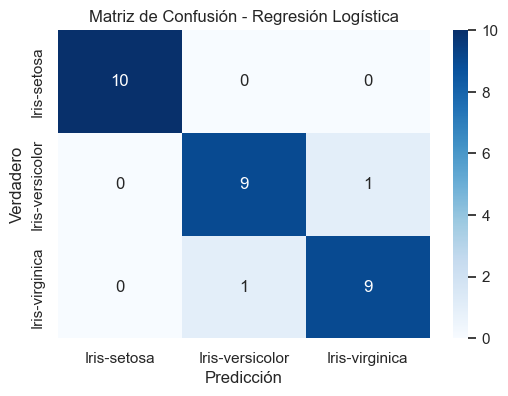


Modelo: KNN
Precisi√≥n (Accuracy): 0.9333

--- Reporte de Clasificaci√≥n ---
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



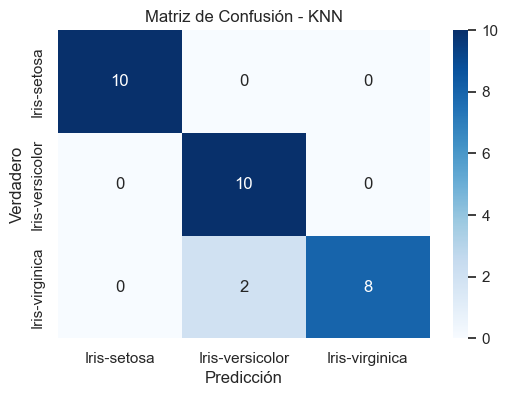


Modelo: SVM (lineal)
Precisi√≥n (Accuracy): 1.0000

--- Reporte de Clasificaci√≥n ---
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



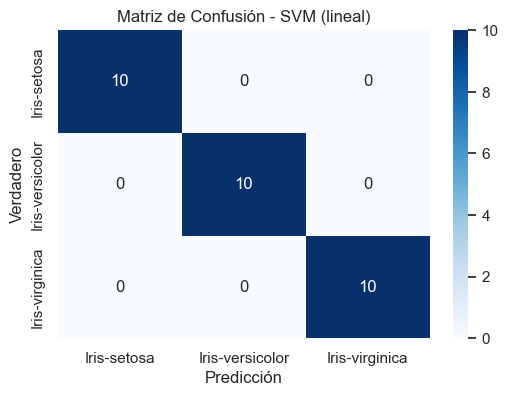


Modelo: Random Forest
Precisi√≥n (Accuracy): 0.9000

--- Reporte de Clasificaci√≥n ---
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



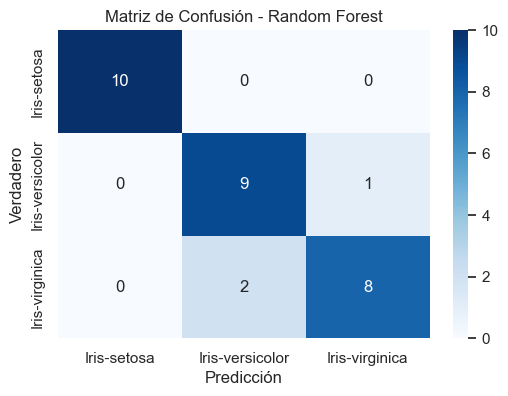


Modelo: Gradient Boosting
Precisi√≥n (Accuracy): 0.9000

--- Reporte de Clasificaci√≥n ---
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



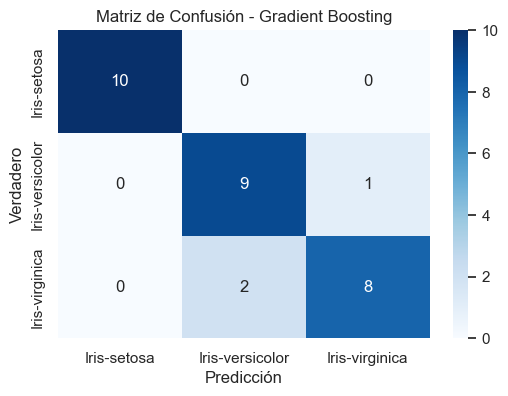

In [18]:
# Importar los modelos de clasificaci√≥n
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Definir modelos
modelos = {
    "Regresi√≥n Log√≠stica": LogisticRegression(max_iter=200, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM (lineal)": SVC(kernel='linear', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Entrenar y evaluar
for nombre, modelo in modelos.items():
    print(f"\n==============================")
    print(f"Modelo: {nombre}")
    print("==============================")

    # Entrenar
    modelo.fit(X_train, y_train)

    # Predicciones
    y_pred = modelo.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Precisi√≥n (Accuracy): {acc:.4f}")

    # Reporte de clasificaci√≥n
    print("\n--- Reporte de Clasificaci√≥n ---")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Matriz de confusi√≥n
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('Predicci√≥n')
    plt.ylabel('Verdadero')
    plt.title(f'Matriz de Confusi√≥n - {nombre}')
    plt.show()


## Comparaci√≥n de Modelos de Clasificaci√≥n en el Dataset Iris

Hemos entrenado y evaluado cinco modelos diferentes: Regresi√≥n Log√≠stica, KNN, SVM (lineal), Random Forest y Gradient Boosting. A continuaci√≥n se presentan los resultados obtenidos en t√©rminos de accuracy, m√©tricas de clasificaci√≥n y matrices de confusi√≥n.

#### 1. **Regresi√≥n Log√≠stica**
- **Accuracy:** 93.3%
- **Fortalezas:** Clasifica perfectamente Setosa.
- **Debilidades:** Confunde levemente entre Versicolor y Virginica.
- **Matriz de Confusi√≥n:**
  - 10/10 Setosa correctas.
  - 1 error Versicolor ‚Üî Virginica.

#### 2. **K-Nearest Neighbors (KNN, k=5)**
- **Accuracy:** 93.3%
- **Fortalezas:** Identifica sin error a Setosa y Versicolor (recall=1.0 para ambas).
- **Debilidades:** Confunde m√°s que la regresi√≥n log√≠stica entre Virginica y Versicolor (2 errores).
- **Matriz de Confusi√≥n:**
  - 10/10 Setosa.
  - 10/10 Versicolor, pero recibi√≥ 2 Virginica mal clasificadas.
  - 8/10 Virginica.

#### 3. **Support Vector Machine (SVM - lineal)**
- **Accuracy:** 100%
- **Fortalezas:** Clasifica correctamente **todas las especies sin errores.**
- **Debilidades:** Ninguna en este caso (pero puede ser sensible a datos con ruido o outliers en datasets m√°s complejos).
- **Matriz de Confusi√≥n:**
  - 10/10 correctas para cada clase.
  - **Cero confusiones.**

#### 4. **Random Forest**
- **Accuracy:** 90%
- **Fortalezas:** Buena clasificaci√≥n general.
- **Debilidades:** Menor rendimiento en Versicolor y Virginica.
- **Matriz de Confusi√≥n:**
  - Setosa: 10/10 correctas.
  - Versicolor: 9 correctas, 1 error.
  - Virginica: 8 correctas, 2 errores.

#### 5. **Gradient Boosting**
- **Accuracy:** 90%
- **Fortalezas:** Similar a Random Forest, buen desempe√±o en general.
- **Debilidades:** Misma confusi√≥n que Random Forest en Versicolor y Virginica.
- **Matriz de Confusi√≥n:**
  - Setosa: 10/10 correctas.
  - Versicolor: 9 correctas, 1 error.
  - Virginica: 8 correctas, 2 errores.

### Trabajo Futuro y Recomendaciones

- **SVM** es el modelo ganador en Iris, pero en datasets m√°s grandes o con ruido puede perder rendimiento. Se recomienda probar **SVM con kernel RBF** para casos no lineales.
- Para **Random Forest y Gradient Boosting,** se puede mejorar el desempe√±o con:
   - Ajuste de hiperpar√°metros (`n_estimators, max_depth, learning_rate`).
   - Uso de **validaci√≥n cruzada** para asegurar estabilidad del modelo.
- Explorar t√©cnicas de **reducci√≥n de dimensionalidad** (PCA, LDA) para visualizar mejor la separaci√≥n entre Versicolor y Virginica.
- En un escenario real, ser√≠a interesante comparar tambi√©n con **Redes Neuronales o modelos Ensamblados** (votar entre varios clasificadores).

## **Conclusi√≥n:**
En el dataset Iris, **SVM lineal** es claramente el mejor modelo. Sin embargo, en trabajos futuros con datos m√°s complejos, se recomienda explorar **SVM con kernels no lineales** o **Gradient Boosting optimizado** para obtener un balance entre precisi√≥n y robustez.

#### Guardar todos los Modelos 

In [19]:
# Guardar los modelos entrenados usando joblib
import joblib
import os

# Crear el directorio 'models' si no existe
if not os.path.exists('models'):
    os.makedirs('models')

# Usar el diccionario 'modelos' ya existente con los modelos entrenados
for nombre, modelo in modelos.items():
    filename = f"models/{nombre}_iris_classifier.pkl"
    joblib.dump(modelo, filename)
    print(f" Modelo '{nombre}' guardado en: {filename}")

print("\nTodos los modelos se han guardado exitosamente.")


 Modelo 'Regresi√≥n Log√≠stica' guardado en: models/Regresi√≥n Log√≠stica_iris_classifier.pkl
 Modelo 'KNN' guardado en: models/KNN_iris_classifier.pkl
 Modelo 'SVM (lineal)' guardado en: models/SVM (lineal)_iris_classifier.pkl
 Modelo 'Random Forest' guardado en: models/Random Forest_iris_classifier.pkl
 Modelo 'Gradient Boosting' guardado en: models/Gradient Boosting_iris_classifier.pkl

Todos los modelos se han guardado exitosamente.
